In [136]:
#Importan las librerias necesarias
from qutip import *
import qutip as qt


import numpy as np
import matplotlib.pyplot as plt

In [137]:
from scipy.signal import find_peaks

# Hamiltoniano

In [138]:
#Parámetros del sistema

#Número de fotones es tres, pero se debe incluir la posibilidad de que no hayan fotones dentro del sistema
N=4

#Número de emisores
n=10

#Momentum angular total
j=5

# #Proyección de j
# m=-j

#Diferencia energética cavidad
wc=1

#Diferencia energética emisores
wa=1

#Fuerza de acoplamiento campo-materia
A=0.1

#Término que representa esa fuerza de acoplamiento en ese número de emisores
g=A/((n)**(1/2))


#Operadores del sistema


#Operadores de momentum angular para los emisores
jz=tensor(jmat(j,'z'), identity(N))

jmin=tensor(jmat(j,'-'), identity(N))

jmax=tensor(jmat(j,'+'), identity(N))



#Operador destrucción de los modos de cavidad
#La forma de la identity se hizo para que cuadrara las dimensiones con
#respecto a los operadores de materia
a =tensor(identity(jmin.dims[0][0]),destroy(N))


#Hamiltoniano de Tavis-Cummings
htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)
htc

Quantum object: dims = [[11, 4], [11, 4]], shape = (44, 44), type = oper, isherm = True
Qobj data =
[[ 5.  0.  0. ...  0.  0.  0.]
 [ 0.  6.  0. ...  0.  0.  0.]
 [ 0.  0.  7. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  0.  0.]
 [ 0.  0.  0. ...  0. -3.  0.]
 [ 0.  0.  0. ...  0.  0. -2.]]

# Estados

In [139]:
#Estados para la parte fotónica

#|0> Estado base fotónico
p0=qt.fock(N,0) 

#|1> Primer modo de excitación
p1=qt.fock(N,1) 

# |2> Segundo modo de excitación
p2=qt.fock(N,2) 

# |3> Tercer modo de excitación
p3=qt.fock(N,3) 

In [140]:
#Estados para la parte de materia...Aquí estoy usando un estado diferente de Dicke. Estoy usando un marco de 
#Fock para los estados de Dicke. Necesito el estado de Dicke para crear una condición inicial (estado inicial)
#para resolver el Hamiltoniano...

#|0> 'Estado base de la materia'
d0=qt.basis(int(2*j+1), 0, 0)

#|1> 'Primer estado exitado de la materia'
d1=qt.basis(int(2*j+1), 1, 0)
d2=qt.basis(int(2*j+1), 2, 0)

# |3> 'Máximo esta exitado'
d3=qt.basis(int(2*j+1), n, 0)
d3

Quantum object: dims = [[11], [1]], shape = (11, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]

# Base Global

In [141]:
#Aunque aquí exactamente no tengo -J. 
#¿El estado base tiene el *índice* cero. Ese índice indica, el valor -J? 

# |-J,3>
d0p3=tensor([d0,p3])
d0p3

# |-J+1,2>
d1p2=tensor([d1,p2])
d1p2
# |-J+2,1>
d2p1=tensor([d2,p1])
d2p1
# |-J+3,0>
d3p0=tensor([d3,p0])
d3p0

Quantum object: dims = [[11, 4], [1, 1]], shape = (44, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]

# Triple Estado Estelar como condición inicial

In [142]:
#Coeficientes de la...
n0=((2)**(1/2))/3
n3=((7)**(1/2))/3
#...condicion inicial

star=n0*p0+n3*p3
#Este es el que según yo debería sevir, ya que es el que tienen a los emisores en el estado base.
# initial=tensor(d0,star)

#Pero este tiene a los emisores en sus estados excitados, y es el que reproduce las gráficas más pare
#cidas al artículo. 
initial=tensor(d3,star)

initial.full()

array([[0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],


# Solución de la ecuación de Schrodinger

In [275]:
B=3000
#Tiempo en el que evoluciona el sistema
tlist=np.linspace(start=0,stop=B,num=B+B+B+B)

#Solución de la ecuación de Schrödinger
resultado=sesolve(htc, initial, tlist, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)

#Forma de acceder a los estados del sistema
resultado.states

#El número de estados que surgen, corresponde al numero num
#ya que son los 'puntos' que se toman del lapso. En cada punto, se conocen 
#los estados del sistema.
len(resultado.states)

12000

# Matriz de densidad 

In [276]:
def rho(x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser UN número menor al número de estados puestos en el linspace del sesolve"
    
    return(resultado.states[x]*resultado.states[x].dag())

#Esta sería la matriz de densidad del estado 59
rho(B-1)

Quantum object: dims = [[11, 4], [11, 4]], shape = (44, 44), type = oper, isherm = True
Qobj data =
[[0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 ...
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.08219844+0.j]]

# Trazas Parciales

In [277]:
# ptrace(partematerial=0)
rho(0).ptrace(0)

Quantum object: dims = [[11], [11]], shape = (11, 11), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

In [278]:
# ptrace(partefotónica=1)
rho(0).ptrace(1)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.22222222 0.         0.         0.41573971]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.41573971 0.         0.         0.77777778]]

# Entropía Lineal

In [279]:
def entropia (x):
    "Entropía lineal usando un ket"
    rho(x)
    return(entropy_linear(rho(x).ptrace(0)))


#Entropía lineal para el estado 0, es decir: t=0
entropia(0)

0.0

# Grafica de Entropía Lineal

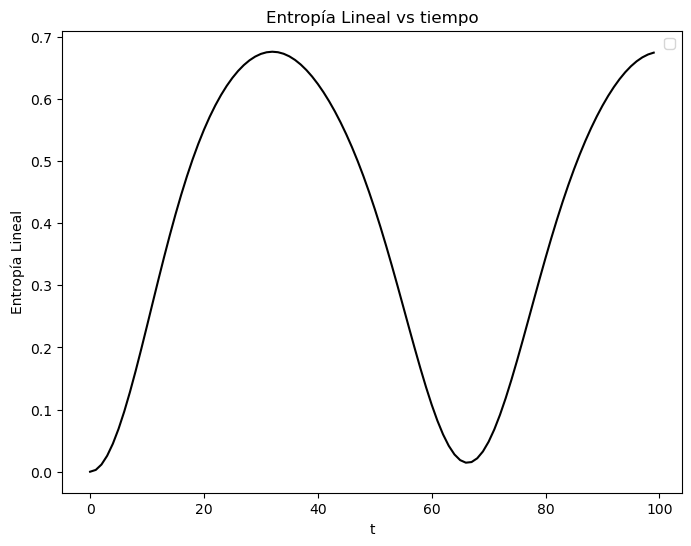

In [280]:
# Este es el  espacio donde se va a dinujar la gráfica

#El eje x va desde 0 hasta 365
x_vals=[i for i in range(100)]

#Se evalúan los valores de la entropía lineal para todos los valores de x
#valores de entropía lineal para el estado x
y1_vals=[]

for i in range(len(x_vals)):
    y1_vals.append(entropia(i))
    

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_vals, linestyle='-', color='black')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

# Función de Correlación de Segundo Orden

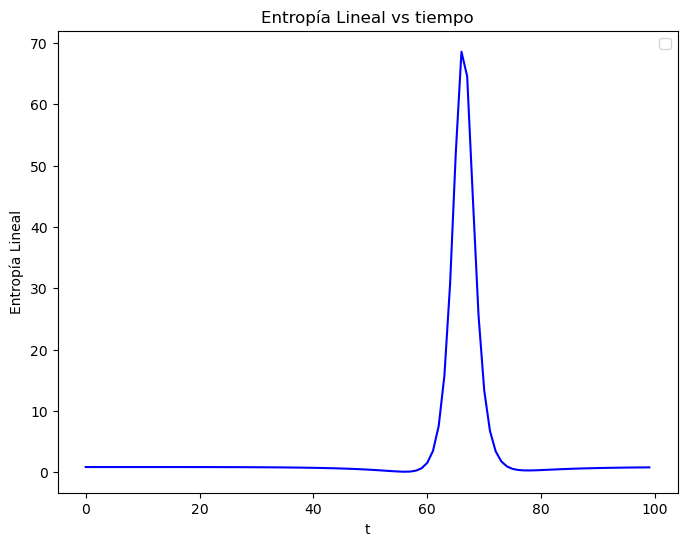

In [281]:
#operadores para crear la función de correlacion óptica de segundo orden
up=a.dag()*a.dag()*a*a
down=a.dag()*a

#Funcion de correlacion
def correlacion (x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser un número menor al número de estados puestos en el linspace del sesolve"
    numerador=expect(up, resultado.states[x])
    denominador=expect(down, resultado.states[x])*expect(down, resultado.states[x])
    return(numerador/denominador)

#x es un valor menor a num, que corresponde al valor del eje x de la grafica
x_vals=[i for i in range(100)]

#Valores de función de correlacion de segundo orden para el estado x
y2_vals=[]

for i in range(len(x_vals)):
    y2_vals.append(correlacion(i))
    
# Graficar los valores de x e y
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y2_vals, linestyle='-', color='b')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

# Ambas Gráficas Superpuestas

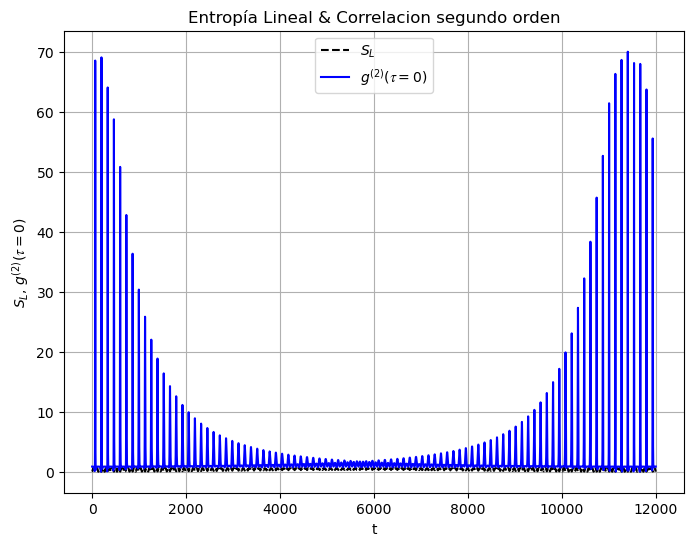

<class 'list'>


In [282]:
def entropiaycorrelacion(final):
    "Grafica entropía lineal y función de correlación óptica de segundo orden."
    "Argumento: final"
    "Corresponde al valor más grande de la absisa de la gráfica"
    
    
    x_vals=[i for i in range(final)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        

    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(type(x_vals))
    
    
    
# entropiaycorrelacion(310) 310 para el caso 1.
# entropiaycorrelacion(900)
# entropiaycorrelacion(2900)
entropiaycorrelacion(B+B+B+B)

# Puntos Importantes

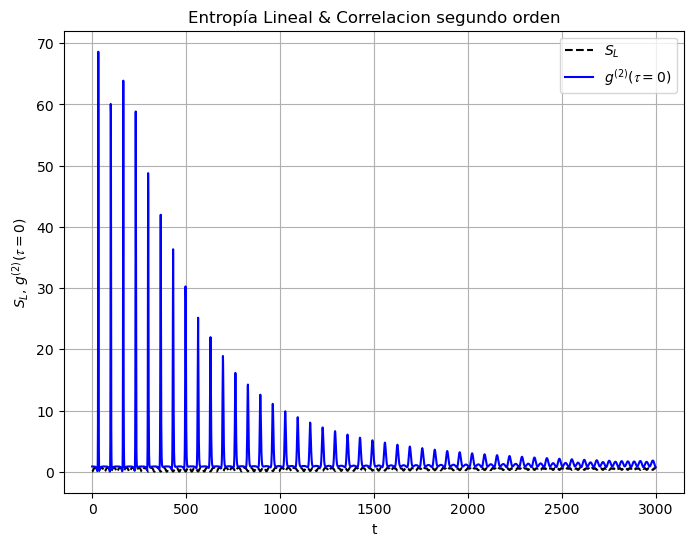

<class 'list'>


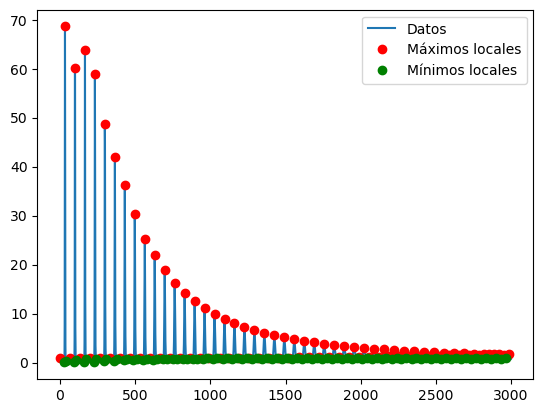

[  1  33  66  99 133 166 199] [ 0.85714349 68.61718441  0.85745163 60.08375195  0.85832477 63.88848144
  0.85976638]
separation  separation  separation  separation  separation  separation  separation  separation  separation  separation  
[ 28  39  94 106 160 174 226] [0.09253177 0.30325257 0.02060523 0.50125529 0.06966736 0.63106181
 0.17758474]


In [227]:
def entropiaycorrelacion(final):
    "Grafica entropía lineal y función de correlación óptica de segundo orden."
    "Argumento: final"
    "Corresponde al valor más grande de la absisa de la gráfica"
    
    
    x_vals=[i for i in range(final)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        

    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(type(x_vals))
    
    

    #Forma de encontrar los máximos y mínimos locales de la gráfica.
    #Es indispensable que para que funcione las listas deben ser un array de numpy.
    x = np.array(x_vals)
    y = np.array(y2_vals)

    # Encuentra los máximos locales
    peaks, _ = find_peaks(y)
    # Encuentra los mínimos locales invirtiendo los datos
    min_peaks, _ = find_peaks(-y)

    # Grafica los datos
    plt.plot(x, y, label='Datos')
    # Marca los máximos locales
    plt.plot(x[peaks], y[peaks], 'ro', label='Máximos locales')
    # Marca los mínimos locales
    plt.plot(x[min_peaks], y[min_peaks], 'go', label='Mínimos locales')

    plt.legend()
    plt.show()
    
    
    # Manera de acceder a los máximos y mínimos
#     print(y[peaks],x[peaks], len(y[peaks]), len(x[peaks]))
    
    
    #Slicing de esas listas
    Wxmax=x[peaks][0:7]
    Wymax=y[peaks][0:7]
    
    Wxmin=x[min_peaks][0:7]
    Wymin=y[min_peaks][0:7]
  

    print(Wxmax, Wymax)
    print('separation  '*10)
    print(Wxmin, Wymin)
    
    
# entropiaycorrelacion(310) 310 para el caso 1.
# entropiaycorrelacion(900)
# entropiaycorrelacion(2900)
entropiaycorrelacion(B)

# Gráficas secundarias

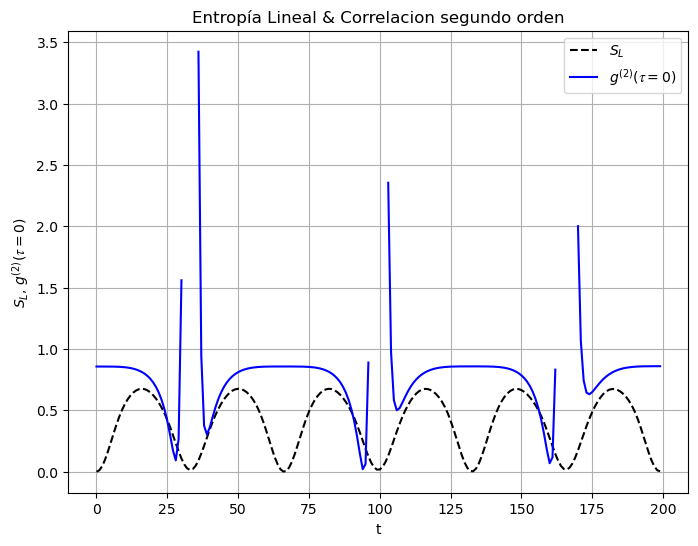

In [246]:
def secundarias (periodo, límite):
    #Gráfica para valores menores de 1
    
    x_vals=[i for i in range(periodo)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        
        
        
        
    for i in range(len(y2_vals)): 
        if y2_vals[i]>=límite:
            y2_vals[i]=np.nan
        
    
    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()

#Para aquirir esta gráfica muy bien, hay que jugar con el linspace que soluciona la ecuación de Schrödinger. 
secundarias(200,3.50)

# Función de Wigner

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

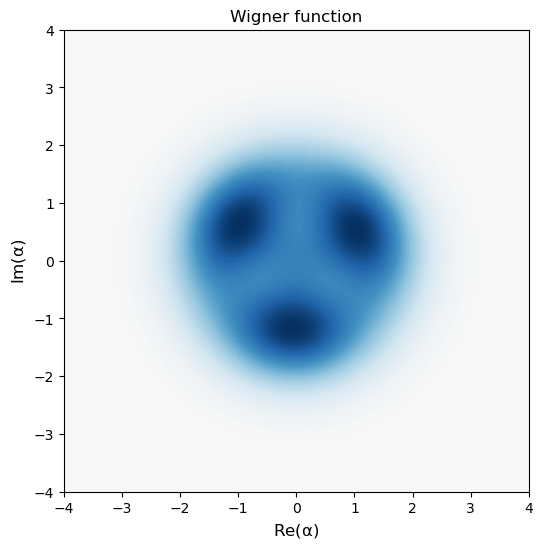

In [200]:
#Función de Wigner Fotónica
plot_wigner(rho(30).ptrace(1), fig=None, ax=None, figsize=(6, 6), cmap=None, alpha_max=4, colorbar=False, method='clenshaw', projection='2d')


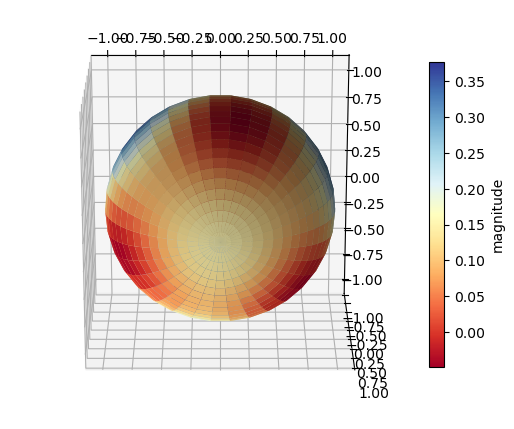

In [70]:
# Función de Wigner de Materia

psi=rho(30).ptrace(0)
theta = np.linspace(0, np.pi, 35)
phi = np.linspace(0, 2 * np.pi, 35)

W, THETA, PHI = spin_wigner(psi, theta, phi)


fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 2, projection='3d')
f2, a2 = plot_spin_distribution_3d(W.real, THETA, PHI, fig=fig, ax=ax)
ax.view_init(110, -90)